
 Le premier pic sera observé avec un angle 2θ = 10.944303879977868 ° et correspond au plan (0, 0, 1)

 Le second pic sera observé avec un angle 2θ = 21.990063679739606 ° et correspond au plan (0, 0, 2)

 Le troisième pic sera observé avec un angle 2θ = 24.753517318919673 ° et correspond au plan (1, 1, 1)

 On remarque un 4e indice dans la notation des plans. Celui-ci est utilisé pour les systèmes hexagonal et 
 rhombohédrique et se note (hkil) avec i qui est un indice redondant. Il respecte l'équation h + k + i = 0. 
 Cet indice sert à faire apparaitre les symétries de permutation.


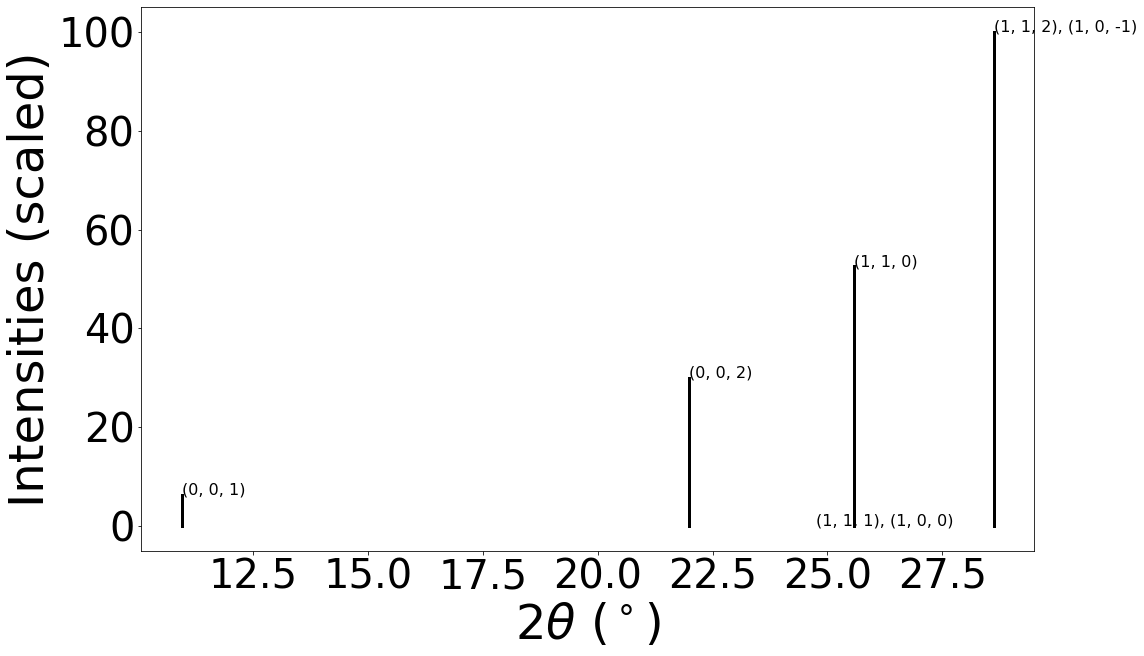

In [3]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer, PointGroupAnalyzer
from pymatgen.util.coord import pbc_shortest_vectors
from pymatgen.util.num import abs_cap
from pymatgen.util.typing import Vector3Like
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifParser
from pymatgen.core.lattice import Lattice
from pymatgen.core.sites import Site
from pymatgen.core.structure import IMolecule
from IPython.display import Image
from pymatgen.core.operations import SymmOp
from pymatgen.analysis.diffraction.core import AbstractDiffractionPatternCalculator, DiffractionPattern
from pymatgen.analysis.diffraction.xrd import XRDCalculator

import pymatgen.analysis.diffraction.core as dpanc
import pymatgen.analysis.diffraction.xrd as dpan
import pymatgen.symmetry.analyzer as span
with MPRester("eKJMKclFzVrDeK1fBnBn") as m:
#with XRDCalculator(1.5406, symprec=0, debye_waller_factors=None) as x

    # Structure du matériau
    structure = m.get_structure_by_material_id("mp-9082")    
    stru=span.SpacegroupAnalyzer(structure)
    struc=stru.find_primitive()
    xrd=dpan.XRDCalculator(wavelength='CuKa', symprec=0, debye_waller_factors=None)
    patern=xrd.get_pattern(struc, scaled=True, two_theta_range=(0,30))
    print("\n Le premier pic sera observé avec un angle 2θ =",patern.x[0],"° et correspond au plan",patern.hkls[0][0]["hkl"])
    print("\n Le second pic sera observé avec un angle 2θ =",patern.x[1],"° et correspond au plan",patern.hkls[1][0]["hkl"])
    print("\n Le troisième pic sera observé avec un angle 2θ =",patern.x[2],"° et correspond au plan",patern.hkls[2][0]["hkl"])
    plot=xrd.get_plot(struc, two_theta_range=(0, 30), annotate_peaks=True, ax=None, with_labels=True, fontsize=16)